In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns

### Конфигурация для подключения к базе данных `data-analyst-advanced-sql`
Эта база данных содержит схему `stackoverflow`, с которой мы будем работать в проекте

In [2]:
db_config = {
    'user': 'praktikum_student', # Username
    'pwd': 'Sdf4$2;d-d30pp', # password
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432, # connection port
    'db': 'data-analyst-advanced-sql' # database name
}  

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

### Creating a connection

In [3]:
engine = create_engine(connection_string) 

Пример запроса к базе данных

`sample_df` является pandas-датафреймом.

In [4]:
query = '''
SELECT *
FROM stackoverflow.users
LIMIT 10;
'''

sample_df = pd.read_sql_query(query, con=engine) 

In [5]:
sample_df

,id,creation_date,display_name,last_access_date,location,reputation,views
0,1,2008-07-31 14:22:31,Jeff Atwood,2018-08-29 02:34:23,"El Cerrito, CA",44300,408587
1,2,2008-07-31 14:22:31,Geoff Dalgas,2018-08-23 17:31:56,"Corvallis, OR",3491,23966
2,3,2008-07-31 14:22:31,Jarrod Dixon,2018-08-30 20:56:24,"Raleigh, NC, United States",13418,24396
3,4,2008-07-31 14:22:31,Joel Spolsky,2018-08-14 22:18:15,"New York, NY",28768,73755
4,5,2008-07-31 14:22:31,Jon Galloway,2018-08-29 16:48:36,"San Diego, CA",39172,11700
5,8,2008-07-31 21:33:24,Eggs McLaren,2018-04-09 02:04:56,None,942,6372
6,9,2008-07-31 21:35:27,Kevin Dente,2018-08-30 18:18:03,"Oakland, CA",14337,4949
7,11,2008-08-01 00:59:11,Anonymous User,2008-08-01 00:59:11,None,1890,2123
8,13,2008-08-01 04:18:05,Chris Jester-Young,2018-08-30 02:47:23,"Raleigh, NC, United States",177138,35414
9,17,2008-08-01 12:02:22,Nick Berardi,2018-01-22 01:35:38,"Issaquah, WA",44443,4786


# Задание 1

Выведите общую сумму просмотров постов за каждый месяц 2008 года. Если данных за какой-либо месяц в базе нет, такой месяц можно пропустить. Результат отсортируйте по убыванию общего количества просмотров.

| month_date  | total_views |
| ------------- | ------------- |
| 2008-09-01  | 452928568  |
| 2008-10-01  | 365400138  |
| ...         | ... |

In [6]:
query = '''
SELECT 
    TO_CHAR(creation_date, 'YYYY-MM') AS month_date,
    SUM(views_count) AS total_views
FROM stackoverflow.posts
WHERE EXTRACT(YEAR FROM creation_date) = 2008
GROUP BY month_date
ORDER BY total_views DESC;
'''

views_per_month_df = pd.read_sql_query(query, con=engine)
print(views_per_month_df)

  month_date  total_views
0    2008-09    452928568
1    2008-10    365400138
2    2008-11    221759651
3    2008-12    197792841
4    2008-08    131367083
5    2008-07       669895


Судя по общему количеству просмотров публикаций за каждый месяц 2008 года, становится очевидным, что между месяцами существуют значительные различия в данных. Вот краткий анализ:

1. **Сентябрь 2008 г.**: в этом месяце зафиксировано наибольшее общее количество просмотров публикаций — 452 928 568. Это указывает на пик пользовательской активности и интереса к Stack Overflow в этот период.

2. **Октябрь 2008 г.**: Общее количество просмотров в этом месяце заметно ниже, чем в сентябре, но все же существенное - 365 400 138. Это может означать небольшое снижение активности пользователей или естественное колебание.

3. **Ноябрь 2008 г.**: Общее количество просмотров значительно снизилось до 221 759 651 по сравнению с предыдущими двумя месяцами. Это снижение может быть связано с различными факторами, включая сезонные колебания, праздники или изменения в поведении пользователей.

4. **Декабрь 2008 г.**: Общее количество просмотров продолжает снижаться до 197 792 841, что можно объяснить сезоном отпусков, когда пользователи могут быть менее активными на платформе.

5. **Август 2008 г.**: В августе общее количество просмотров ниже (131 367 083) по сравнению с месяцами с более высокой активностью, что указывает на относительно более спокойный период в летние месяцы.

6. **Июль 2008 г.**: В июле самое низкое общее количество просмотров (669 895), что значительно ниже, чем в другие месяцы. Это может быть связано с ранними стадиями развития платформы Stack Overflow или другими внешними факторами, влияющими на вовлеченность пользователей.

Различия в данных между месяцами могут быть вызваны сочетанием факторов, в том числе:

- **Сезонные тенденции**. Активность пользователей на онлайн-платформах часто зависит от сезона, праздников и событий. В определенные месяцы вовлеченность может быть выше из-за таких факторов, как летние каникулы, праздники в конце года или период возвращения в школу.

- **Зрелость платформы**: Stack Overflow, возможно, был менее известен или использовался в первые месяцы своего существования (например, июль 2008 г.) по сравнению с более поздними месяцами, когда он приобрел популярность.

- **Внешние факторы**. События за пределами платформы, такие как крупные выпуски программного обеспечения, конференции или отраслевые тенденции, могут влиять на активность пользователей и количество просмотров.

- **Поведение пользователей**. Участие и вовлеченность пользователей могут меняться по разным причинам, включая личный график, рабочую нагрузку и интересы.

В заключение можно отметить, что различия в данных между месяцами, вероятно, связаны с сочетанием сезонных колебаний, роста платформы и внешних факторов, которые влияют на вовлеченность пользователей и активность в Stack Overflow.

# Задание 2

Выведите имена самых активных пользователей, которые в первый месяц после регистрации (включая день регистрации) дали больше 100 ответов. Вопросы, которые задавали пользователи, не учитывайте. Для каждого имени пользователя выведите количество уникальных значений `user_id`. Отсортируйте результат по полю с именами в лексикографическом порядке.

| display_name | count |
| ------------ | ----- |
| 1800 INFORMATION | 1 |
| Adam Bellaire | 1 |
| Adam Davis | 1 |
| ... | ... |

In [7]:
query = '''
WITH UserActivity AS (
    SELECT
        u.display_name AS username,
        COUNT(DISTINCT p.user_id) AS unique_user_ids
    FROM
        stackoverflow.users u
    JOIN
        stackoverflow.posts p ON u.id = p.user_id
    WHERE
        p.post_type_id = (SELECT id FROM stackoverflow.Post_types WHERE type = 'Answer')
        AND DATE_TRUNC('day', p.creation_date) BETWEEN DATE_TRUNC('day', u.creation_date) AND DATE_TRUNC('day', u.creation_date + INTERVAL '1 month')
    GROUP BY
        u.display_name
    HAVING
        COUNT(*) > 100
)
SELECT
    username,
    unique_user_ids
FROM
    UserActivity
ORDER BY
    username;
'''

result_df = pd.read_sql_query(query, con=engine)
print(result_df.head(30))

                     username  unique_user_ids
0            1800 INFORMATION                1
1               Adam Bellaire                1
2                  Adam Davis                1
3                   Adam Liss                1
4                        Alan                8
5                       Amy B                1
6               Ben Hoffstein                1
7                       Brian               15
8                   Cade Roux                1
9                      CesarB                1
10                      Chris               29
11  ConcernedOfTunbridgeWells                1
12                      Craig               10
13                 Dale Ragan                1
14                        Dan               21
15               Eric Z Beard                1
16                       Espo                1
17                    FlySwat                1
18               Franci Penov                1
19                    GEOCHET                1
20           

Некоторые наблюдения и аномалии в данных:

1. **Низкое количество уникальных пользователей**: У многих пользователей в списке значение unique_user_ids равно 1, что указывает на то, что они единственные пользователи, которые соответствуют критериям публикации более 100 ответов в течение первого месяца. Это говорит о том, что очень мало пользователей соответствуют этому конкретному порогу активности.

2. **Имена пользователей**: Некоторые имена пользователей кажутся специфическими, возможно, связанными с учетными записями компании или организации (например, «1800 INFORMATION»). Они могут не представлять отдельных пользователей в традиционном смысле.

3. **Высокоактивные пользователи**: Есть пользователи с большим количеством unique_user_id, например «Chris» с 29 unique_user_id. Это говорит о наличии высокоактивных пользователей, соответствующих критериям.

4. **Разнообразная база пользователей**: В список входят пользователи с разным уровнем активности, от 1 до 29 unique_user_ids, что указывает на разнообразную базу пользователей.

5. **Разреженные данные**: Многие пользователи, соответствующие критериям, опубликовали лишь несколько ответов, в то время как некоторые очень активные пользователи опубликовали значительное количество ответов. Эта разница в уровнях активности среди пользователей заметна.

6. **Возможные проблемы с качеством данных**: Наличие таких имен пользователей, как «1800 INFORMATION» и «GEOCHET», может указывать на проблемы с качеством данных или необычные учетные записи.

В целом аномалии в данных позволяют предположить, что критерий публикации более 100 ответов в течение первого месяца регистрации встречаются относительно редко, и для пользователей, соответствующих этому порогу, могут возникнуть уникальные обстоятельства. Для понимания конкретного контекста и причин этих аномалий потребуются дальнейшие исследования.

# Задание 3

Выведите количество постов за 2008 год по месяцам. Отберите посты от пользователей, которые зарегистрировались в сентябре 2008 года и сделали хотя бы один пост в декабре того же года. Отсортируйте таблицу по значению месяца по убыванию.

| month | count |
| ------|------ |
| 2008-12-01 | 17641 |
| 2008-11-01 | 18294 |
| ... | ... |

In [8]:
query = '''
SELECT
    CAST(DATE_TRUNC('month', creation_date) AS date) AS month,
    COUNT(DISTINCT id)
FROM
    stackoverflow.posts
WHERE
    user_id IN (
        SELECT DISTINCT u.id
        FROM stackoverflow.posts AS p
        JOIN stackoverflow.users AS u ON p.user_id = u.id
        WHERE
            u.creation_date BETWEEN '2008-09-01' AND '2008-09-30'
            AND p.creation_date BETWEEN '2008-12-01' AND '2008-12-31'
    )
    AND creation_date BETWEEN '2008-01-01' AND '2008-12-31'
GROUP BY
    month
ORDER BY
    month DESC;
'''

posts_df = pd.read_sql_query(query, con=engine)
print(posts_df)

        month  count
0  2008-12-01  17295
1  2008-11-01  17944
2  2008-10-01  26594
3  2008-09-01  24793
4  2008-08-01     32


Данные показывают, что количество постов в августе 2008 года значительно сократилось по сравнению с другими месяцами. Это падение является ***аномальным*** и может быть вызвано различными причинами, такими как техническая ошибка, изменение поведения пользователя или изменение политик платформы.

Возможные причины этой аномалии могут включать в себя:

- **Технические проблемы**. В течение этого конкретного месяца на платформе могли возникнуть технические проблемы или сбои в работе, которые могли помешать пользователям публиковать посты.

- **Сезонные колебания**. Активность пользователей на онлайн-платформах иногда может проявлять сезонные закономерности, а август может быть месяцем, когда многие пользователи находятся в отпуске или менее активны в Интернете.

- **Изменения платформы**. Изменения в политиках, алгоритмах или пользовательском интерфейсе платформы могли препятствовать или повлиять на взаимодействие пользователей в течение этого месяца.

- **Неполнота данных**. Также возможно, что данные за август 2008 г. неполны или содержат недостающие записи, что приводит к искусственно заниженному количеству постов.

Чтобы определить точную причину этой аномалии, может потребоваться дальнейшее исследование, включая проверку записей платформы и данных о взаимодействии с пользователями.

# Задание 4

Используя данные о постах, выведите несколько полей:

- идентификатор пользователя, который написал пост;
- дата создания поста;
- количество просмотров у текущего поста;
- сумму просмотров постов автора с накоплением.

Данные в таблице должны быть отсортированы по возрастанию идентификаторов пользователей, а данные об одном и том же пользователе — по возрастанию даты создания поста.

| user_id | creation_date | views_count | cumulative_count |
| ------ | -------------- | ----------- | ---------------- |
| 1 | 2008-07-31 23:41:00  | 480476   | 480476  |
| 1 | 2008-07-31 23:55:38  | 136033 | 616509  | 
| 1 | 2008-07-31 23:56:41  | 0 |  616509  |
| ... | ... | ... | ... |
| 2 | 2008-07-31 23:56:41 | 79087  | 79087 |
| 2 | 2008-08-01 05:09:56 | 65443 | 144530 |
| ... | ...  | ...  | ...  |

In [9]:
query = '''
WITH UserPostViews AS (
    SELECT
        p.user_id AS user_id,
        p.creation_date AS creation_date,
        p.views_count AS views_count,
        SUM(p.views_count) OVER (PARTITION BY p.user_id ORDER BY p.creation_date) AS cumulative_count
    FROM
        stackoverflow.posts p
)

SELECT
    user_id,
    creation_date,
    views_count,
    cumulative_count
FROM
    UserPostViews
ORDER BY
    user_id ASC,
    creation_date ASC;
'''

user_post_views_df = pd.read_sql_query(query, con=engine)
print(user_post_views_df)

        user_id       creation_date  views_count  cumulative_count
0             1 2008-07-31 23:41:00       480476            480476
1             1 2008-07-31 23:55:38       136033            616509
2             1 2008-07-31 23:56:41            0            616509
3             1 2008-08-04 02:45:08            0            616509
4             1 2008-08-04 04:31:03            0            616509
...         ...                 ...          ...               ...
243791  5696608 2008-12-23 16:00:37            0              2804
243792  5696608 2008-12-23 17:35:09            0              2804
243793  5696608 2008-12-24 01:02:48            0              2804
243794  5696608 2008-12-30 14:34:45            0              2804
243795  5696608 2008-12-30 16:32:12            0              2804

[243796 rows x 4 columns]


# Задание 5

Найдите среднее количество постов пользователей в день за август 2008 года. Отберите данные о пользователях, которые опубликовали больше 120 постов за август. Дни без публикаций не учитывайте. 

Отсортируйте результат по возрастанию среднего количества постов. Значения можно не округлять.

| user_id | avg_daily |
| ------- | --------- |
| 116     | 4.777778  |
| 234     | 5.208333  |
| ...     | ... |

In [10]:
query = '''
WITH UserAugustPostCounts AS (
    SELECT
        u.id AS user_id,
        COUNT(p.id) AS post_count
    FROM
        stackoverflow.users u
    LEFT JOIN
        stackoverflow.posts p ON u.id = p.user_id
                           AND p.creation_date >= '2008-08-01'
                           AND p.creation_date < '2008-09-01'
    GROUP BY
        u.id
    HAVING
        COUNT(p.id) > 120
)

SELECT
    uapc.user_id,
    COALESCE(uapc.post_count::float / d.days_with_posts, 0) AS avg_daily
FROM
    UserAugustPostCounts uapc
LEFT JOIN (
    SELECT
        u.id AS user_id,
        COUNT(DISTINCT DATE(p.creation_date)) AS days_with_posts
    FROM
        stackoverflow.users u
    LEFT JOIN
        stackoverflow.posts p ON u.id = p.user_id
                           AND p.creation_date >= '2008-08-01'
                           AND p.creation_date < '2008-09-01'
    GROUP BY
        u.id
) AS d ON uapc.user_id = d.user_id
ORDER BY
    avg_daily ASC;
'''

user_august_post_counts_df = pd.read_sql_query(query, con=engine)
print(user_august_post_counts_df)

   user_id  avg_daily
0      116   4.777778
1      234   5.208333
2       91   5.681818
3      905   7.000000
4      383   7.277778


# Задание 6

Сколько в среднем дней в период с 1 по 7 декабря 2008 года пользователи взаимодействовали с платформой? Для каждого пользователя отберите дни, в которые он или она опубликовали хотя бы один пост. Нужно получить одно целое число — не забудьте округлить результат. 

| result |
| -----  |
| <целое число> |

In [11]:
query = '''
SELECT
    ROUND(AVG(interaction_days)) AS result
FROM (
    SELECT
        u.id AS user_id,
        COUNT(DISTINCT DATE(p.creation_date)) AS interaction_days
    FROM
        stackoverflow.users u
    JOIN
        stackoverflow.posts p ON u.id = p.user_id
                           AND p.creation_date >= '2008-12-01'
                           AND p.creation_date <= '2008-12-07'
    GROUP BY
        u.id
) AS UserInteractionDays;
'''

avr_df = pd.read_sql_query(query, con=engine)
print(avr_df)

   result
0     2.0


***Итоговая таблица показывает, что в среднем пользователи взаимодействовали с платформой примерно 2 дня в период с 1 по 7 декабря 2008 г. Это означает, что в течение этой конкретной недели пользователи были активны на платформе в среднем около двух дней.***

Некоторые возможные выводы или идеи, которые можно сделать из этого результата:

- **Периодическая активность**: пользователи не проявляли постоянной активности на платформе в течение всей недели. Вместо этого они взаимодействовали в среднем 2 дня из 7.

- **Вариативность**: активность пользователей может существенно различаться - некоторые пользователи активны все 7 дней, тогда как другие могут быть активны только один или два дня.

- **Сезонность**: В зависимости от характера платформы и ее пользовательской базы могут существовать сезонные закономерности или события, влияющие на активность пользователей в течение конкретной недели.

- **Анализ вовлеченности**: Администраторы платформы могут использовать эту информацию для оценки вовлеченности пользователей в определенные периоды времени, что позволяет им адаптировать контент, события или рекламные акции для повышения активности пользователей.

- **Удержание**: Понимание того, как часто пользователи взаимодействуют с платформой, также может помочь в оценке удержания пользователей и определении стратегий, способствующих более последовательному участию.

В целом, эти данные дают представление об активности пользователей за конкретную неделю, и необходим дальнейший анализ и контекст, чтобы сделать более конкретные выводы и принять обоснованные решения на основе этой информации.

# Задание 7

Выведите историю активности каждого пользователя в таком виде: идентификатор пользователя, дата публикации поста. Отсортируйте вывод по возрастанию идентификаторов пользователей, а для каждого пользователя — по возрастанию даты публикации.

Добавьте в таблицу новое поле: для каждого поста в нём будет указано название месяца предпоследней публикации пользователя относительно текущей. Если такой публикации нет, укажите `NULL`.  Python автоматически поменяет `NULL` на `None`, но дополнительно преобразовывать значения `None` вам не нужно.

Посмотрите внимательно на образец таблицы: для первых двух постов предпоследней публикации нет, но, начиная с третьего поста, в новое поле входит нужный месяц. Для следующего пользователя в первые две записи поля `second_last_month` тоже войдёт `NULL`.

| user_id | creation_date | second_last_month |
| ------- | ------------- | ----------------- |
| 1       | 2008-07-31 23:41:00 | None |
| 1       | 2008-07-31 23:55:38 | None |
| 1       | 2008-07-31 23:56:41 | July |
| 1       | 2008-08-04 02:45:08 | July |
| 1       | 2008-08-04 04:31:03 | July |
| 1       | 2008-08-04 08:04:42 | August |
| ... | ... | ... |

In [12]:
query = '''
WITH UserActivity AS (
    SELECT
        p.user_id AS user_id,
        p.creation_date AS creation_date,
        LAG(TO_CHAR(p.creation_date, 'Month'), 2) OVER (PARTITION BY p.user_id ORDER BY p.creation_date) AS second_last_month
    FROM
        stackoverflow.posts p
)

SELECT
    ua.user_id,
    ua.creation_date,
    CASE
        WHEN ua.second_last_month IS NULL THEN NULL
        ELSE ua.second_last_month
    END AS second_last_month
FROM
    UserActivity ua
ORDER BY
    ua.user_id ASC,
    ua.creation_date ASC;
'''

user_activity_df = pd.read_sql_query(query, con=engine)
print(user_activity_df)

        user_id       creation_date second_last_month
0             1 2008-07-31 23:41:00              None
1             1 2008-07-31 23:55:38              None
2             1 2008-07-31 23:56:41         July     
3             1 2008-08-04 02:45:08         July     
4             1 2008-08-04 04:31:03         July     
...         ...                 ...               ...
243791  5696608 2008-12-23 16:00:37         December 
243792  5696608 2008-12-23 17:35:09         December 
243793  5696608 2008-12-24 01:02:48         December 
243794  5696608 2008-12-30 14:34:45         December 
243795  5696608 2008-12-30 16:32:12         December 

[243796 rows x 3 columns]


# Задание 8

Рассчитайте аналог Retention Rate по месяцам для пользователей StackOverflow. Объедините пользователей в когорты по месяцу их первого поста. Возвращение определяйте по наличию поста в текущем месяце. 

| cohort_dt | session_date | users_cnt | cohort_users_cnt | retention_rate |
| --- | --- | --- | --- | --- |
| 2008-07-01 00:00:00 | 2008-07-01 00:00:00 | 3 | 3 | 100 |
| 2008-07-01 00:00:00 | 2008-08-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-09-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-10-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-11-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-12-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-08-01 00:00:00 | 2008-08-01 00:00:00 | 2151 | 2151 | 100 |
| ... | ... | ... | ... | ... |

In [15]:
query = '''
WITH profile AS (
    WITH t AS (
        SELECT DISTINCT
            user_id,
            FIRST_VALUE(DATE_TRUNC('month', creation_date)) OVER (PARTITION BY user_id ORDER BY DATE_TRUNC('month', creation_date)) AS cohort_date
        FROM
            stackoverflow.posts
    )
    SELECT
        user_id,
        cohort_date,
        COUNT(user_id) OVER (PARTITION BY cohort_date) AS cohort_users_cnt
    FROM
        t
),
sessions AS (
    SELECT
        user_id,
        DATE_TRUNC('month', creation_date) AS session_date
    FROM
        stackoverflow.posts
    GROUP BY
        user_id,
        session_date
)
SELECT
    p.cohort_date AS cohort_dt,
    session_date,
    COUNT(p.user_id) AS users_cnt,
    cohort_users_cnt,
    ROUND(COUNT(p.user_id) * 100.0 / cohort_users_cnt, 2) AS retention_rate
FROM
    profile AS p
JOIN
    sessions AS s ON p.user_id = s.user_id
GROUP BY
    cohort_dt,
    session_date,
    cohort_users_cnt;
'''

user_cohorts_df = pd.read_sql_query(query, con=engine)
print(user_cohorts_df)

    cohort_dt session_date  users_cnt  cohort_users_cnt  retention_rate
0  2008-07-01   2008-07-01          3                 3          100.00
1  2008-07-01   2008-08-01          2                 3           66.67
2  2008-07-01   2008-09-01          1                 3           33.33
3  2008-07-01   2008-10-01          2                 3           66.67
4  2008-07-01   2008-11-01          1                 3           33.33
5  2008-07-01   2008-12-01          2                 3           66.67
6  2008-08-01   2008-08-01       2151              2151          100.00
7  2008-08-01   2008-09-01       1571              2151           73.04
8  2008-08-01   2008-10-01       1275              2151           59.27
9  2008-08-01   2008-11-01       1050              2151           48.81
10 2008-08-01   2008-12-01        894              2151           41.56
11 2008-09-01   2008-09-01       7678              7678          100.00
12 2008-09-01   2008-10-01       4132              7678         

### Постройте тепловую карту Retention Rate. Какие аномалии или другие необычные явления удалось выявить? Сформулируйте гипотезы о возможных причинах.

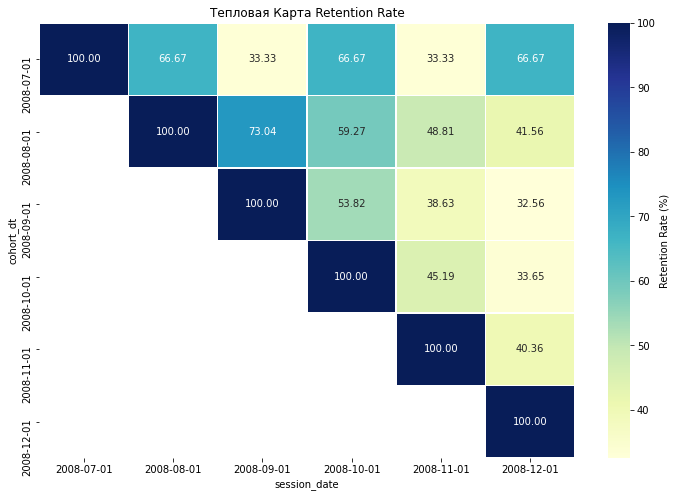

In [18]:
data = {
    'cohort_dt': [
        '2008-07-01', '2008-07-01', '2008-07-01', '2008-07-01', '2008-07-01',
        '2008-07-01', '2008-08-01', '2008-08-01', '2008-08-01', '2008-08-01',
        '2008-08-01', '2008-09-01', '2008-09-01', '2008-09-01', '2008-09-01',
        '2008-10-01', '2008-10-01', '2008-10-01', '2008-11-01', '2008-11-01',
        '2008-12-01'
    ],
    'session_date': [
        '2008-07-01', '2008-08-01', '2008-09-01', '2008-10-01', '2008-11-01',
        '2008-12-01', '2008-08-01', '2008-09-01', '2008-10-01', '2008-11-01',
        '2008-12-01', '2008-09-01', '2008-10-01', '2008-11-01', '2008-12-01',
        '2008-10-01', '2008-11-01', '2008-12-01', '2008-11-01', '2008-12-01',
        '2008-12-01'
    ],
    'retention_rate': [
        100.00, 66.67, 33.33, 66.67, 33.33, 66.67, 100.00, 73.04, 59.27, 48.81,
        41.56, 100.00, 53.82, 38.63, 32.56, 100.00, 45.19, 33.65, 100.00, 40.36,
        100.00
    ]
}

df = pd.DataFrame(data)

pivot_df = df.pivot('cohort_dt', 'session_date', 'retention_rate')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5, cbar_kws={'label': 'Retention Rate (%)'})
plt.title("Тепловая Карта Retention Rate")
plt.show()

Из тепловой карты retention rate можно сделать несколько интересных наблюдений и потенциальных гипотез о необычных явлениях:

1. **Внезапное падение retention rate**: в когорте 01 июля 2008 г. наблюдается резкое падение уровня удержания с 66,67% в августе до 33,33% в сентябре, а затем снова до 66,67% в октябре. Одна из гипотез заключается в том, что некоторые пользователи могли публиковать сообщения реже или меньше участвовать в сентябре, что привело к падению.

2. **Постепенное снижение**: в большинстве когорт наблюдается постепенное снижение показателей удержания с течением времени. Например, в когорте 2008-08-01 уровень удержания снижается со 100 % в августе до 41,56 % в декабре. Это может быть связано с оттоком пользователей или снижением вовлеченности с течением времени.

3. **Стабильное удержание**: Когорта 01 сентября 2008 г. сохраняет относительно стабильные показатели удержания на протяжении нескольких месяцев с постепенным снижением. Это может указывать на постоянный уровень вовлеченности пользователей.

Гипотезы этих явлений могут включать:

- **Сезонные тенденции**: У пользователей могут быть разные модели взаимодействия в разные сезоны или месяцы.
- **Изменения платформы**: Изменения или обновления платформы могли повлиять на поведение пользователей.
- **Сегментация пользователей**: разные когорты могут представлять собой отдельные сегменты пользователей с разными привычками публикации сообщений.
- **Внешние факторы**: Внешние события или рекламные акции могут повлиять на активность пользователей.

Для дальнейшего изучения и подтверждения этих гипотез могут потребоваться дополнительные данные и анализ, такие как отслеживание поведения пользователей, опросы пользователей и др.

# Задание 9


На сколько процентов менялось количество постов ежемесячно с 1 сентября по 31 декабря 2008 года? Отобразите таблицу со следующими полями:

- номер месяца;
- количество постов за месяц;
- процент, который показывает, насколько изменилось количество постов в текущем месяце по сравнению с предыдущим.

Если постов стало меньше, значение процента должно быть отрицательным, если больше — положительным. Округлите значение процента до двух знаков после запятой.

Напомним, что при делении одного целого числа на другое в PostgreSQL в результате получится целое число, округлённое до ближайшего целого вниз. Чтобы этого избежать, переведите делимое в тип `numeric`.

| creation_month | posts_count | percentage |
| -------------- | ----------- | ---------- |
| 9 | 70731 | Nan |
| 10 | 63102 | -10.33 |
| ... | ... | ... |

In [16]:
query = '''
WITH MonthlyPosts AS (
    SELECT
        TO_CHAR(p.creation_date, 'YYYY-MM') AS creation_month,
        COUNT(*) AS posts_count
    FROM
        stackoverflow.posts p
    WHERE
        p.creation_date >= '2008-09-01' AND p.creation_date <= '2008-12-31'
    GROUP BY
        TO_CHAR(p.creation_date, 'YYYY-MM')
),

PercentageChange AS (
    SELECT
        mp1.creation_month,
        mp1.posts_count,
        ROUND(
            (mp1.posts_count::numeric - mp2.posts_count::numeric) / NULLIF(mp2.posts_count::numeric, 0) * 100, 2
        ) AS percentage
    FROM
        MonthlyPosts mp1
    LEFT JOIN
        MonthlyPosts mp2
    ON
        TO_DATE(mp1.creation_month, 'YYYY-MM') - interval '1 month' = TO_DATE(mp2.creation_month, 'YYYY-MM')
)

SELECT
    pc.creation_month,
    pc.posts_count,
    pc.percentage
FROM
    PercentageChange pc
ORDER BY
    pc.creation_month ASC;
'''

monthly_posts_df = pd.read_sql_query(query, con=engine)
print(monthly_posts_df)

  creation_month  posts_count  percentage
0        2008-09        70371         NaN
1        2008-10        63102      -10.33
2        2008-11        46975      -25.56
3        2008-12        44592       -5.07


<details>

<summary>Подсказка</summary>
Эту задачу стоит декомпозировать. Сформируйте запрос, который отобразит номер месяца и количество постов. Затем можно использовать оконную функцию, которая вернёт значение за предыдущий месяц, и посчитать процент.
</details>

### Постройте круговую диаграмму с количеством постов по месяцам.

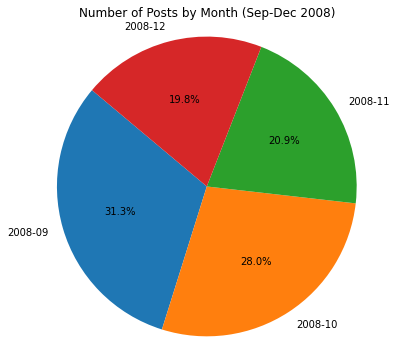

In [17]:
data = {
    'creation_month': ['2008-09', '2008-10', '2008-11', '2008-12'],
    'posts_count': [70371, 63102, 46975, 44592],
}
df = pd.DataFrame(data)

plt.figure(figsize=(6, 6))
plt.pie(df['posts_count'], labels=df['creation_month'], autopct='%1.1f%%', startangle=140)
plt.title('Number of Posts by Month (Sep-Dec 2008)')
plt.axis('equal')

plt.show()

# Задание 10

Выгрузите данные активности пользователя, который опубликовал больше всего постов за всё время. Выведите данные за октябрь 2008 года в таком виде:

- номер недели;
- дата и время последнего поста, опубликованного на этой неделе.

| week_creation | creation_date |
| ------------- | ------------- |
| 40 | 2008-10-05 09:00:58 |
| 41 | 2008-10-12 21:22:23 |
| ... | ... |

In [18]:
query = '''
WITH UserPostCounts AS (
    SELECT
        p.user_id,
        COUNT(*) AS post_count
    FROM
        stackoverflow.posts p
    WHERE
        p.creation_date >= '2008-10-01' AND p.creation_date < '2008-11-01'
    GROUP BY
        p.user_id
    ORDER BY
        post_count DESC
    LIMIT 1
)

SELECT
    TO_CHAR(p.creation_date, 'WW') AS week_number,
    MAX(p.creation_date) AS week_creation
FROM
    stackoverflow.posts p
JOIN
    UserPostCounts upc
ON
    p.user_id = upc.user_id
WHERE
    p.creation_date >= '2008-10-01' AND p.creation_date < '2008-11-01'
GROUP BY
    TO_CHAR(p.creation_date, 'WW')
ORDER BY
    week_number ASC;
'''

user_post_counts_df = pd.read_sql_query(query, con=engine)
print(user_post_counts_df)

  week_number       week_creation
0          40 2008-10-06 21:35:00
1          41 2008-10-13 18:44:22
2          42 2008-10-20 20:57:36
3          43 2008-10-27 23:02:02
4          44 2008-10-31 22:16:01
